In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Préparation des données ( Titanic )

In [2]:
data = pd.read_excel('titanic3.xls')

data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
data = data.drop(['name','ticket', 'boat', 'body', 'cabin', 'home.dest'], axis=1)
data.head()

#pclass : classe du voyageur
#survived : survie ou non
#name : pas intéressant
#sexe : H ou F
#age
#sibsp : sibling / spouses abord
#parch : parent / children abord
#ticket : pas intéressant 
#fare : prix d'achat
#cabin pourrait être interréssant car renseigne la hauteur par rapport à l'eau, mais trop peu de données
#embarked : port d'embarquement
#boat : pas assez de données
#body : pas assez de données
#home.dest : pas intéressnat


,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,1,0,female,2.0000,1,2,151.5500,S
3,1,0,male,30.0000,1,2,151.5500,S
4,1,0,female,25.0000,1,2,151.5500,S


In [5]:
data = data.dropna()

In [6]:
data.shape

(1043, 8)

In [7]:
data['sex'].replace(['male', 'female'], [0,1], inplace=True)
data['embarked'].replace(['S','C', 'Q'],[0,1,2],inplace=True)
#Les données sont prêtes !
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,1,29.0000,0,0,211.3375,0
1,1,1,0,0.9167,1,2,151.5500,0
2,1,0,1,2.0000,1,2,151.5500,0
3,1,0,0,30.0000,1,2,151.5500,0
4,1,0,1,25.0000,1,2,151.5500,0


# Analyse des données

In [8]:
data.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,2.209012,0.407478,0.370086,29.813199,0.504314,0.421860,36.603024,0.299137
std,0.840685,0.491601,0.483059,14.366261,0.913080,0.840655,55.753648,0.553014
min,1.000000,0.000000,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,0.000000,0.000000,8.050000,0.000000
50%,2.000000,0.000000,0.000000,28.000000,0.000000,0.000000,15.750000,0.000000
75%,3.000000,1.000000,1.000000,39.000000,1.000000,1.000000,35.077100,1.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


<AxesSubplot:>

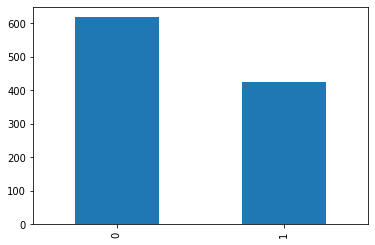

In [9]:
#repartition des données
data['age'].hist()

<AxesSubplot:>

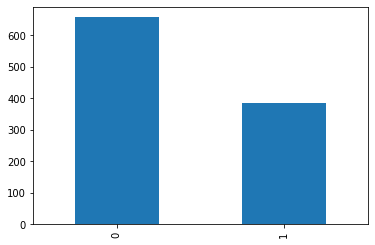

In [10]:
data['sex'].value_counts().plot.bar()

<AxesSubplot:>

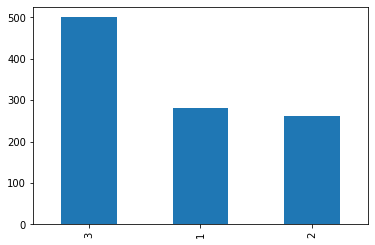

In [11]:
data['pclass'].value_counts().plot.bar()

In [12]:
data.groupby(['sex','pclass']).mean()

survived        age     sibsp     parch        fare  embarked
sex pclass                                                               
0   1       0.350993  41.029250  0.403974  0.331126   74.818213  0.430464
    2       0.145570  30.815401  0.354430  0.208861   20.934335  0.132911
    3       0.169540  25.863027  0.488506  0.287356   12.103374  0.229885
1   1       0.961832  36.839695  0.564885  0.511450  112.485402  0.526718
    2       0.893204  27.499191  0.514563  0.669903   23.267395  0.126214
    3       0.473684  22.185307  0.736842  0.796053   14.655758  0.421053

35% des hommes en 1er classe ont survécu,
96% des femmes en 1er classe ont survécu

# Apprentissage

In [13]:
from sklearn.model_selection import cross_val_score
#diférentes manière de créer les groupes
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, ShuffleSplit
#train_test_split : sépare en groupe
#KFold : spare en k groupes égaux et répète la boucle train/test autant de fois qu'il y a de groupe
#LeaveOneOut = KFold avec k le nombre d'élèments du groupe train
#StratifiedKFold : classes déséquilibrées -> permet de forcer le nombre d'éléments d'une classe dans le test set
#ShuffleSplit : mélange et prend une partie, le fait k fois
#GroupKFold / GroupShuffleSplit : éléments dépendants -> sépare en groupe prenant en compte les dépendances et recommence pour couvrir les différents cas possible
from sklearn.metrics import confusion_matrix
import random

In [14]:
y = data.pop('survived')
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random.seed())
#on sépare en données d'entraînement et donnée de test (3/4)

## RandomForest

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(X_train,y_train) #on entraine le clf sur les données d'entraînement 
y_pred = clf.predict(X_test) #donnée prédit pour le jeu de donnée X_test
confusion_matrix(y_test, y_pred) #matrice de confusion

array([[118,  36],
       [ 27,  80]])

In [16]:
clf.score(X_test,y_test) #précision : cb sont bien classé

0.7586206896551724

In [17]:
#cross validation
t_score = cross_val_score(clf, X, y, cv=10)
t_score.mean()

0.7141758241758241

### variation des paramètres

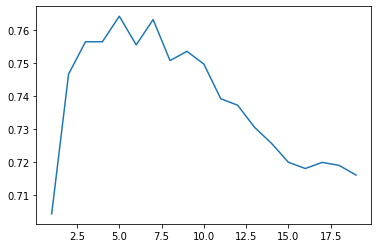

In [18]:
a = []
b = []

for i in range(1, 20):
    clf = RandomForestClassifier(max_depth = i)
    clf.fit(X_train,y_train)
    t_score = cross_val_score(clf, X, y, cv=10)
    r = t_score.mean()
    a.append(i)
    b.append(r)

plt.plot(a, b)

attention: fonction assez longue, 20 modèles à entraîner et tester... 

Le resultat observer sur le graphe est assez aléatoire. Le jeu de donné n'est pas assez important il est difficile de voir une récurrence.
Ce qu'on observe cependant :
- précision maximum de la cross validation souvent obtenu à une max_depth = 2 ou 3
- à partir de max_depth = 12 ou 13, la précision décroit de manière général, on entre en surapprentissage 

## KNeighbors

In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train,y_train) #on entraine le clf sur les données d'entraînement 
y_pred = clf.predict(X_test) #donnée prédit pour le jeu de donnée X_test
confusion_matrix(y_test, y_pred) #matrice de confusion

array([[116,  38],
       [ 51,  56]])

In [20]:
clf.score(X_test,y_test) #précision : cb sont bien classé

0.6590038314176245

In [21]:
#cross validation
t_score = cross_val_score(clf, X, y, cv=10)
t_score.mean()

0.6156318681318682

### variation des paramètres

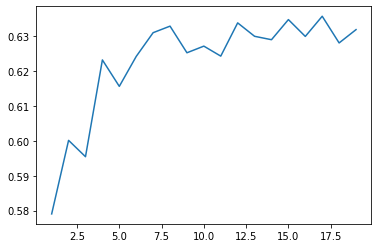

In [22]:
a = []
b = []

for i in range(1, 20):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train,y_train) #on entraine le clf sur les données d'entraînement 
    t_score = cross_val_score(clf, X, y, cv=10)
    r = t_score.mean()
    a.append(i)
    b.append(r)

plt.plot(a, b)

On observe cependant :
- précision maximum de la cross validation souvent obtenu à n_neighbors = 4
- à partir de n_neighbors = 4 la précision décroit de manière général, on entre en surapprentissage 

# influence des attributs

In [23]:
data = data.drop(['sibsp','parch','fare','embarked'], axis=1)
data.head()

,pclass,sex,age
0,1,1,29.0000
1,1,0,0.9167
2,1,1,2.0000
3,1,0,30.0000
4,1,1,25.0000


In [24]:
X = data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random.seed())

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train,y_train) #on entraine le clf sur les données d'entraînement 
#cross validation
t_score = cross_val_score(clf, X, y, cv=10)
t_score.mean()

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train,y_train) #on entraine le clf sur les données d'entraînement 
#cross validation
t_score = cross_val_score(clf, X, y, cv=10)
t_score.mean()

La cross validation rend des resultats légèrement meilleures en enlevant les paramètres 'sibsp', 'parch', 'fare', 'embarked', on en déduit que ces données n'ont pas de liens avec les chances de survit d'un passager et au contraire créent du bruit